Data Generation for perceptron learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dataset(number_of_samples, mean_pos, sd_pos, mean_neg, sd_neg):
    # create positive and negative data
    positive_data = np.random.multivariate_normal(mean_pos, sd_pos, number_of_samples//2).T
    negative_data = np.random.multivariate_normal(mean_neg, sd_neg, number_of_samples//2).T

    # assign positive and negative labels, label 1 to all positive data and label -1 to all negative data
    positive_labels = [1 for i in range(number_of_samples//2)]
    negative_labels = [-1 for i in range(number_of_samples//2)]

    # concatenate positive and negative data
    all_data = [[1, i, j] for i, j in zip(positive_data[0], positive_data[1])] + [[1, i, j] for i, j in zip(negative_data[0], negative_data[1])]
    all_labels = positive_labels + negative_labels

    #Check if the data are separable.
    plt.plot(positive_data[0], positive_data[1], "x", label="positive")
    plt.plot(negative_data[0], negative_data[1], "x", label="negative")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.axis("equal")
    plt.legend(loc="best")
    plt.show()

    # return both X and T
    return all_data, all_labels

In [2]:
positive_data = np.random.multivariate_normal([-5, 3], [[1, 0], [0, 1.5]], 50).T
negative_data = np.random.multivariate_normal([5, -3], [[1, 0], [0, 1.5]], 50).T

    # assign positive and negative labels
positive_labels = [1 for i in range(50)]
negative_labels = [-1 for i in range(50)]

    # concatenate positive and negative data
all_data = [[1, i, j] for i, j in zip(positive_data[0], positive_data[1])] + [[1, i, j] for i, j in zip(negative_data[0], negative_data[1])]
all_labels = positive_labels + negative_labels
all_data

[[1, -5.7849781580516115, 4.281339031807265],
 [1, -5.6517552459148845, 2.755905306308552],
 [1, -4.843006925689211, 2.5945832763155003],
 [1, -4.004954497046912, 2.1650511327288537],
 [1, -4.470975183044307, 4.718765253671594],
 [1, -5.113105083926091, 4.429180514924468],
 [1, -4.826684173323268, 1.6081219652612586],
 [1, -4.483830635862142, 3.337244434635728],
 [1, -3.097290092256392, 3.572013383977561],
 [1, -4.848214622704425, 1.8008171209243327],
 [1, -6.898995576097636, 1.990477322796216],
 [1, -7.894979655973062, 1.4371541986684477],
 [1, -4.460030038341369, 3.830055614815516],
 [1, -5.975605278638662, 3.7325654282216956],
 [1, -4.412449256475813, 1.391998952336902],
 [1, -5.711079825363622, 2.828447828864405],
 [1, -5.590745066520463, 5.844289831027478],
 [1, -5.44445598175387, 2.4005997846478637],
 [1, -4.500921556586621, 0.6845482279831772],
 [1, -4.452816908242408, 1.7370367317147737],
 [1, -4.0250125581792835, 1.5044069666188045],
 [1, -5.8228882485411555, 3.503507632014944

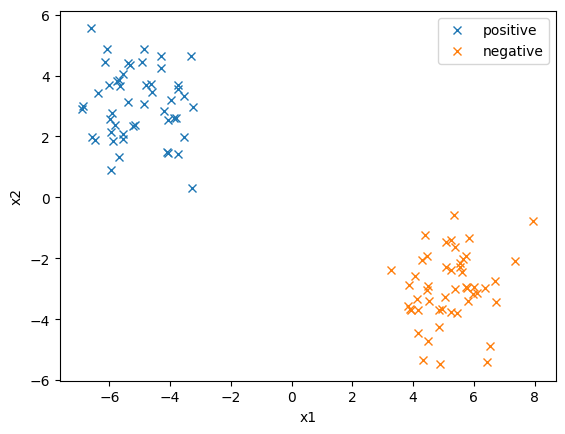

In [3]:
#The standard deviations should be selected such that the data is most likely separable
number_of_samples = 100
mean_pos = [-5, 3]
mean_neg = [5, -3]
sd_pos = [[1, 0], [0, 1.5]]
sd_neg = [[1, 0], [0, 1.5]]
X, T = dataset(number_of_samples, mean_pos, sd_pos, mean_neg, sd_neg)

w_manual = [0, -5, 3]    # [w0, w1, w2]

The perceptron is $$a = f_{\vec w}(\vec x)$$


In [4]:
# w is the line parameter
def perceptron(x, w):
  return np.dot(x, w)

In [5]:
import random
# randomly initialize the weights
def random_weights(lowest = -1, highest = 1):
  return [random.uniform(lowest, highest), random.uniform(lowest, highest), random.uniform(lowest, highest)]

In [6]:
def perceptron_learning(X, T, w):
    # first, make a copy of your weights
    w_star = w

    # then, iterate over the data and perform perceptron learning
    for data, label in zip(X, T):
        # print(data)
        if perceptron(data, w_star) * label < 0:
            w_star[0] = w_star[0] + label
            w_star[1] = w_star[1] + label*data[1]
            w_star[2] = w_star[2] + label*data[2]

    # finally, return the optimal weights
    print("optimised weight: ", w_star)
    return w_star

In [7]:
#executing the perceptron learning

# create random weights
w_initial = random_weights()

# perform perceptron learning
w_star = perceptron_learning(X, T, w_initial)

optimised weight:  [0.19169180755434256, -0.9561257233840059, -0.7078160232634516]


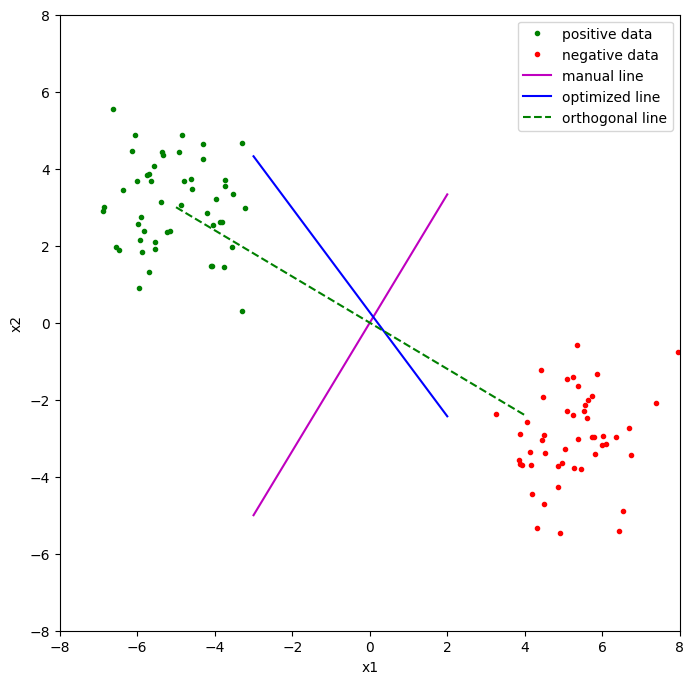

In [8]:
#visualization
def line_parameters(w):
  # compute parametric line parameters from Cartesian coordinates
  beta = -w[1]/w[2]
  gamma = -w[0]/w[2]
  return beta, gamma


# create a square plot
plt.figure(figsize=(8,8))

# plot the positive data points
# X_data = [data[1:] for data in X]
plt.plot([data[1] for data in X[0:number_of_samples//2]], [data[2] for data in X[0:number_of_samples//2]], "g.", label="positive data")
# plot the negative data points
plt.plot([data[1] for data in X[number_of_samples//2+1:number_of_samples]], [data[2] for data in X[number_of_samples//2+1:number_of_samples]], "r.", label="negative data")

# define positions where to evaluate the line:
x1 = np.array([i for i in range(-3, 3, 1)])

# compute line parameters for manual line
beta, gamma = line_parameters(w_manual)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot lines (might need to call this function twice for the two lines)
plt.plot(x1, x2, "m-", label="manual line")

# compute line parameters for optimized line
beta, gamma = line_parameters(w_star)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot lines (might need to call this function twice for the two lines)
plt.plot(x1, x2, "b-", label="optimized line")

x_test = np.array([i for i in range(-5, 5, 1)])
y_test = x_test*(-3/5)
plt.plot(x_test, y_test, "g--", label="orthogonal line")
# make the plot more beautiful
plt.legend(loc="best")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()